# **Peramalan Saham PT Telkom Menggunakan SVM**

# **Import Necessary Package**

In [ ]:
import pandas as pd
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# **Read Dataset**

In [ ]:
# read dataset

tlkm = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TLKM.JK.csv")
tlkm

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2012,1410.0,1420.0,1400.0,1410.0,1080.269043,15267500.0
1,1/3/2012,1410.0,1420.0,1400.0,1410.0,1080.269043,64482500.0
2,1/4/2012,1420.0,1430.0,1400.0,1420.0,1087.930420,73910000.0
3,1/5/2012,1410.0,1430.0,1400.0,1410.0,1080.269043,65095000.0
4,1/6/2012,1390.0,1400.0,1370.0,1390.0,1064.945801,136315000.0
...,...,...,...,...,...,...,...
2728,12/26/2022,3780.0,3800.0,3730.0,3750.0,3750.000000,19216700.0
2729,12/27/2022,3770.0,3840.0,3750.0,3810.0,3810.000000,49816500.0
2730,12/28/2022,3800.0,3810.0,3710.0,3730.0,3730.000000,65006300.0
2731,12/29/2022,3720.0,3790.0,3710.0,3780.0,3780.000000,51703500.0


In [ ]:
# total rows and columns
tlkm.shape

(2733, 7)

In [ ]:
# data types

tlkm.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
tlkm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2012,1410.0,1420.0,1400.0,1410.0,1080.269043,15267500.0
1,1/3/2012,1410.0,1420.0,1400.0,1410.0,1080.269043,64482500.0
2,1/4/2012,1420.0,1430.0,1400.0,1420.0,1087.930420,73910000.0
3,1/5/2012,1410.0,1430.0,1400.0,1410.0,1080.269043,65095000.0
4,1/6/2012,1390.0,1400.0,1370.0,1390.0,1064.945801,136315000.0


# **Visualizing Data**

In [ ]:
tlkm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2.732000e+03
mean,3288.724744,3325.411786,3252.666545,3288.803075,2848.719151,9.882931e+07
std,878.566597,884.193174,872.605296,878.729367,887.778713,6.008152e+07
min,1350.000000,1370.000000,1330.000000,1350.000000,1034.299927,0.000000e+00
25%,2700.000000,2740.000000,2675.000000,2700.000000,2236.074951,6.207538e+07
50%,3400.000000,3440.000000,3360.000000,3400.000000,3061.139770,8.605645e+07
75%,4020.000000,4052.500000,3980.000000,4020.000000,3478.158203,1.192919e+08
max,4850.000000,4850.000000,4780.000000,4800.000000,4750.000000,6.241426e+08


In [ ]:
# tlkm.skew()

<Figure size 1600x800 with 0 Axes>

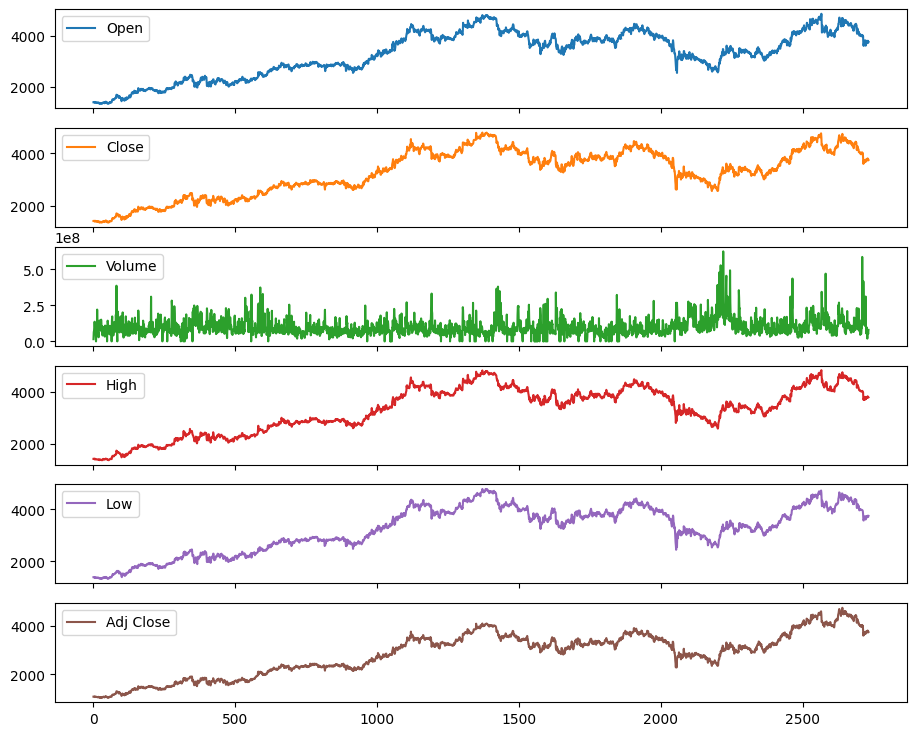

In [ ]:
plt.figure(figsize=(16, 8))
cols = ['Open', 'Close', 'Volume', 'High', 'Low', 'Adj Close']
axes = tlkm[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

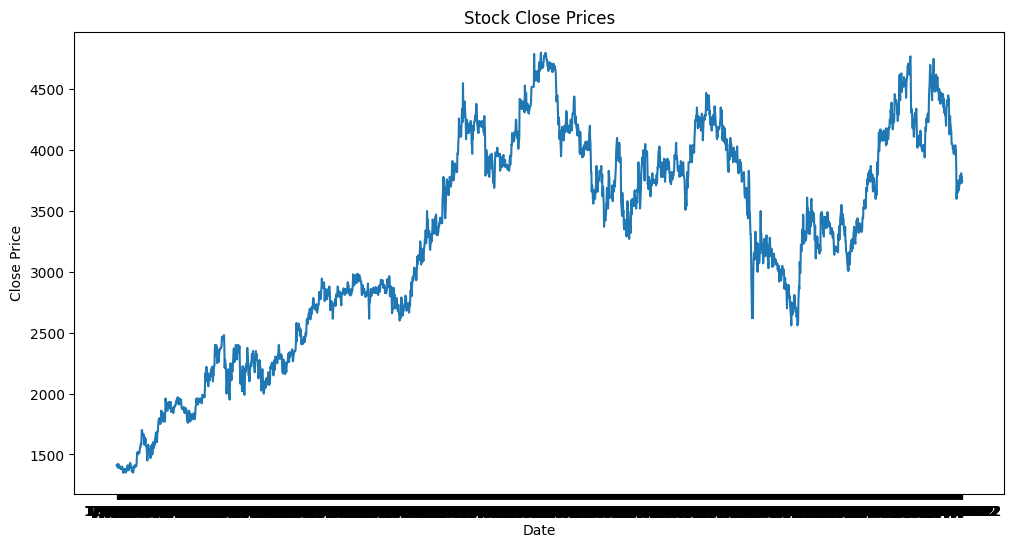

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(tlkm['Date'], tlkm['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Prices')
plt.show()

<Figure size 1500x1000 with 0 Axes>

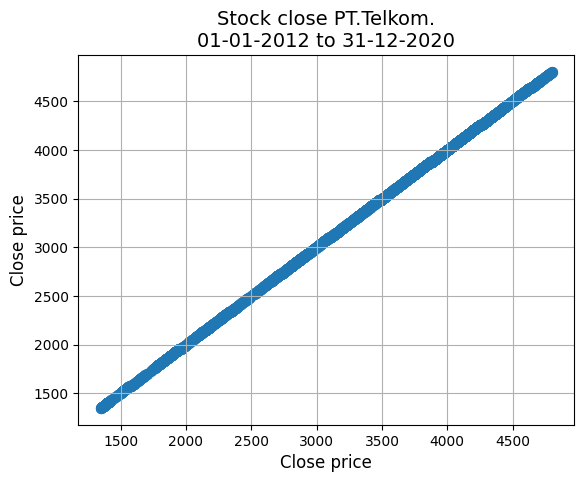

In [ ]:
x= ['Close']; y = ['Close']
plt.figure(figsize=[15,10])
tlkm.plot.scatter(x, y, s=50);
plt.grid(True)
plt.title('Stock close PT.Telkom.\n01-01-2012 to 31-12-2020', fontsize=14, color='black')
plt.xlabel("Close price",fontsize=12, color='black')
plt.ylabel("Close price", fontsize=12, color='black')
plt.show()

In [ ]:
# # tlkm['year'] = tlkm['Date'].dt.year
# sns.boxplot(tlkm['Close'])
# plt.title('Closing Stock Prices by Year')
# plt.show()

In [ ]:
# # distribution
# df_open = tlkm['Open']
# df_open.plot(kind='kde')

# **Cek Missing Value**

In [ ]:
tlkm_close = tlkm['Close']
tlkm_close.shape

(2733,)

In [ ]:
tlkm_close.describe()

count    2732.000000
mean     3288.803075
std       878.729367
min      1350.000000
25%      2700.000000
50%      3400.000000
75%      4020.000000
max      4800.000000
Name: Close, dtype: float64

In [ ]:
tlkm_close.isnull().sum()

1

In [ ]:
# Replace Missing Value with ten rows before NAN
for i in range(len(tlkm_close)):
    if np.isnan(tlkm_close[i]):
        start = max(0, i - 10)
        end = i
        tlkm_close[i] = np.mean(tlkm_close[start:end])

<ipython-input-60-83892147f31f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tlkm_close[i] = np.mean(tlkm_close[start:end])


In [ ]:
tlkm_close.head(1862)

0       1410.0
1       1410.0
2       1420.0
3       1410.0
4       1390.0
         ...  
1857    3990.0
1858    3990.0
1859    3900.0
1860    3980.0
1861    3956.0
Name: Close, Length: 1862, dtype: float64

In [ ]:
tlkm_close.isnull().sum()

0

In [ ]:
tlkm_close.shape

(2733,)

In [ ]:
dates = pd.to_datetime(tlkm['Date'])

# **MULAI**



In [ ]:
# define window size and number of steps to forecast
window_size = 8

In [ ]:
# create windows
X = []
y = []

for i in range(len(tlkm_close) - window_size):
  X.append(tlkm_close[i:(i+window_size)])
  y.append(tlkm_close[i+window_size])

X = np.array(X)
y = np.array(y)

In [ ]:
for i in range(len(X)):
  print(X[i], y[i])

[1410. 1410. 1420. 1410. 1390. 1410. 1420. 1400.] 1400.0
[1410. 1420. 1410. 1390. 1410. 1420. 1400. 1400.] 1390.0
[1420. 1410. 1390. 1410. 1420. 1400. 1400. 1390.] 1400.0
[1410. 1390. 1410. 1420. 1400. 1400. 1390. 1400.] 1400.0
[1390. 1410. 1420. 1400. 1400. 1390. 1400. 1400.] 1400.0
[1410. 1420. 1400. 1400. 1390. 1400. 1400. 1400.] 1380.0
[1420. 1400. 1400. 1390. 1400. 1400. 1400. 1380.] 1380.0
[1400. 1400. 1390. 1400. 1400. 1400. 1380. 1380.] 1390.0
[1400. 1390. 1400. 1400. 1400. 1380. 1380. 1390.] 1380.0
[1390. 1400. 1400. 1400. 1380. 1380. 1390. 1380.] 1400.0
[1400. 1400. 1400. 1380. 1380. 1390. 1380. 1400.] 1400.0
[1400. 1400. 1380. 1380. 1390. 1380. 1400. 1400.] 1380.0
[1400. 1380. 1380. 1390. 1380. 1400. 1400. 1380.] 1370.0
[1380. 1380. 1390. 1380. 1400. 1400. 1380. 1370.] 1350.0
[1380. 1390. 1380. 1400. 1400. 1380. 1370. 1350.] 1380.0
[1390. 1380. 1400. 1400. 1380. 1370. 1350. 1380.] 1380.0
[1380. 1400. 1400. 1380. 1370. 1350. 1380. 1380.] 1360.0
[1400. 1400. 1380. 1370. 1350. 

In [ ]:
X.shape

(2725, 8)

In [ ]:
# split data into train and test sets
split_idx = int(len(X) * 0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

In [ ]:
# print
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (2180, 8)
y_train: (2180,)
X_test: (545, 8)
y_test: (545,)


In [ ]:
# train SVM model

# rbf kernel
rbf_kern = SVR(kernel='rbf', C =100, gamma = 0.00001)
rbf_kern.fit(X_train, y_train)

SVR(C=100, gamma=1e-05)

In [ ]:
# polynomial kernel
poly_kern = SVR(kernel='poly', C=100, degree = 1)
poly_kern.fit(X_train, y_train)

SVR(C=100, degree=1, kernel='poly')

In [ ]:
# linear kernel
# lin_kern = SVR(kernel='linear', C=1, gamma = 'auto')
# lin_kern.fit(X_train, y_train)

In [ ]:
# make predictions
# pred_lin  = lin_kern.predict(X_test)
pred_poly = poly_kern.predict(X_test)
pred_rbf  = rbf_kern.predict(X_test)

In [ ]:
# Generate the dates_test variable
dates_test = dates[split_idx + window_size:]

In [ ]:
predictions_tlkms = pd.DataFrame({'Date': dates_test,
                                  'Actual': y_test,
                                  # 'Linear' : pred_lin,
                               'Polynomial': pred_poly,
                               'RBF': pred_rbf})

predictions_tlkms

,Date,Actual,Polynomial,RBF
2188,2020-10-12,2730.0,2712.510997,2806.292607
2189,2020-10-13,2730.0,2721.452712,2725.227258
2190,2020-10-14,2810.0,2724.836816,2719.694029
2191,2020-10-15,2780.0,2775.612223,2797.288818
2192,2020-10-16,2750.0,2773.450696,2777.465755
...,...,...,...,...
2728,2022-12-26,3750.0,3766.220181,3791.975576
2729,2022-12-27,3810.0,3752.599661,3779.092020
2730,2022-12-28,3730.0,3788.857876,3819.138888
2731,2022-12-29,3780.0,3749.088298,3725.676062


In [ ]:
# # convert to csv
# file_name = 'Predictions.csv'

# # saving the excel
# predictions_tlkms.to_csv(file_name)

In [ ]:
# compute RMSE
# mse_lin = mean_squared_error(y_test, pred_lin)
# rmse_lin = round(np.sqrt(mse_lin),3)

mse_poly = mean_squared_error(y_test, pred_poly)
rmse_poly = round(np.sqrt(mse_poly),3)

mse_rbf = mean_squared_error(y_test, pred_rbf)
rmse_rbf = round(np.sqrt(mse_rbf),3)

In [ ]:
# compute MAPE
# mape_lin = mean_absolute_percentage_error(y_test, pred_lin)
mape_poly = mean_absolute_percentage_error(y_test, pred_poly)
mape_rbf = mean_absolute_percentage_error(y_test, pred_rbf)

In [ ]:
y_train_pred = poly_kern.predict(X_train)
y_test_pred = poly_kern.predict(X_test)

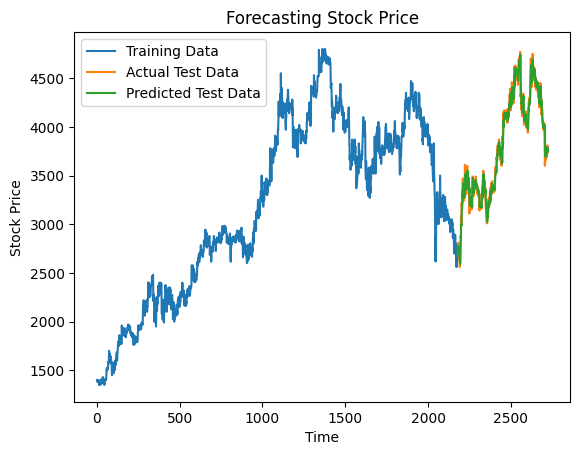

In [ ]:
plt.plot(y_train, label='Training Data')
plt.plot(np.arange(len(y_train), len(y_train)+len(y_test)), y_test, label='Actual Test Data')
plt.plot(np.arange(len(y_train), len(y_train)+len(y_test)), y_test_pred, label='Predicted Test Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Forecasting Stock Price')
plt.legend()
plt.show()

In [ ]:
results = pd.DataFrame({'Model' : [poly_kern, rbf_kern],
                        'RMSE' : [rmse_poly, rmse_rbf],
                        'MAPE' : [mape_poly, mape_rbf]})

results

,Model,RMSE,MAPE
0,"SVR(C=100, degree=1, kernel='poly')",70.977,0.013992
1,"SVR(C=100, gamma=1e-05)",191.768,0.028143


In [ ]:
# Make predictions for the next 5 days
future_predictions = []
window = tlkm_close[-window_size:]  # Initial window for future prediction
last_date = dates.iloc[-1]  # Last date in the dataset

for _ in range(15):
    future_prediction = poly_kern.predict(np.array([window]))[0]
    future_predictions.append(future_prediction)
    window = np.concatenate((window[1:], [future_prediction]))
    last_date += timedelta(days=1)
    print(f"Date: {last_date.strftime('%Y-%m-%d')}, Predicted Price: {future_prediction}")

Date: 2022-12-31, Predicted Price: 3756.780815018636
Date: 2023-01-01, Predicted Price: 3759.7868363059897
Date: 2023-01-02, Predicted Price: 3758.4987162761727
Date: 2023-01-03, Predicted Price: 3760.400125996606
Date: 2023-01-04, Predicted Price: 3759.455799040102
Date: 2023-01-05, Predicted Price: 3759.757605688447
Date: 2023-01-06, Predicted Price: 3759.8101486277706
Date: 2023-01-07, Predicted Price: 3759.735357685039
Date: 2023-01-08, Predicted Price: 3759.913193724476
Date: 2023-01-09, Predicted Price: 3759.996160885615
Date: 2023-01-10, Predicted Price: 3760.1138373574336
Date: 2023-01-11, Predicted Price: 3760.211067436369
Date: 2023-01-12, Predicted Price: 3760.2999768439654
Date: 2023-01-13, Predicted Price: 3760.3960795323087
Date: 2023-01-14, Predicted Price: 3760.486909336666


In [ ]:
df = predictions_tlkms
df['Date'] = pd.to_datetime(df['Date'].astype('datetime64[ns]'))
df.set_index('Date', inplace=True)
df.head()

,Actual,Polynomial,RBF
Date,,,
2020-10-12,2730.0,2712.510997,2806.292607
2020-10-13,2730.0,2721.452712,2725.227258
2020-10-14,2810.0,2724.836816,2719.694029
2020-10-15,2780.0,2775.612223,2797.288818
2020-10-16,2750.0,2773.450696,2777.465755


In [ ]:
# df.set_index('Date', inplace=True)
# df['Date'] = pd.to_datetime(df['Date'].astype('datetime64[ns]'))

In [ ]:
# Resample the data to monthly intervals and get the closing prices for each month
months_actual = df['Actual'].resample('M').mean()
months_predicted_poly = df['Polynomial'].resample('M').mean()
months_predicted_rbf = df['RBF'].resample('M').mean()
# months_predicted_lin = df['Linear'].resample('M').mean()

In [ ]:
# Resample the data to day intervals and get the closing prices for each days
days_actual = df['Actual'].resample('D').mean()
days_predicted_poly = df['Polynomial'].resample('D').mean()
days_predicted_rbf = df['RBF'].resample('D').mean()
# days_predicted_lin = df['Linear'].resample('D').mean()

In [ ]:
# Resample the data to yearly intervals and get the closing prices for each year
year_actual = df['Actual'].resample('Y').mean()
year_predicted_poly = df['Polynomial'].resample('Y').mean()
year_predicted_rbf = df['RBF'].resample('Y').mean()
# year_predicted_lin = df['Linear'].resample('Y').mean()

In [ ]:
day = pd.DataFrame({'actual' : days_actual,
                    # 'Linear': days_predicted_lin,
                    'Polynomial': days_predicted_poly,
                    'RBF': days_predicted_rbf})

In [ ]:
# Drop rows with NaN values
day.dropna(inplace=True)

In [ ]:
day

,actual,Polynomial,RBF
Date,,,
2020-10-12,2730.0,2712.510997,2806.292607
2020-10-13,2730.0,2721.452712,2725.227258
2020-10-14,2810.0,2724.836816,2719.694029
2020-10-15,2780.0,2775.612223,2797.288818
2020-10-16,2750.0,2773.450696,2777.465755
...,...,...,...
2022-12-26,3750.0,3766.220181,3791.975576
2022-12-27,3810.0,3752.599661,3779.092020
2022-12-28,3730.0,3788.857876,3819.138888


In [ ]:
# # convert to csv
# file_name = 'year.csv'

# # saving the excel
# year.to_csv(file_name)

In [ ]:
year = pd.DataFrame({'actual' : year_actual,
                    # 'Linear': year_predicted_lin,
                    'Polynomial': year_predicted_poly,
                    'RBF': year_predicted_rbf})

year

,actual,Polynomial,RBF
Date,,,
2020-12-31,3090.000000,3067.348089,3083.403576
2021-12-31,3476.923077,3472.282408,3466.369130
2022-12-31,4283.902439,4285.128916,4141.365434


In [ ]:
# # Resample the data to monthly intervals and get the closing prices for each weak
# weeks_actual_poly = df['Actual'].resample('W').mean()
# weeks_predicted_poly = df['Polynomial SVR'].resample('W').mean()

# start_date = '2022-12-01'  # Specify the starting date
# filtered_weeks_actual_poly = weeks_actual_poly.loc[start_date:]
# filtered_weeks_predicted_poly = weeks_predicted_poly.loc[start_date:]

# weeks_actual_rbf = df['Actual'].resample('W').mean()
# weeks_predicted_rbf = df['RBF SVR'].resample('W').mean()

# start_date = '2022-12-01'  # Specify the starting date
# filtered_weeks_actual_rbf = weeks_actual_rbf.loc[start_date:]
# filtered_weeks_predicted_rbf = weeks_predicted_rbf.loc[start_date:]

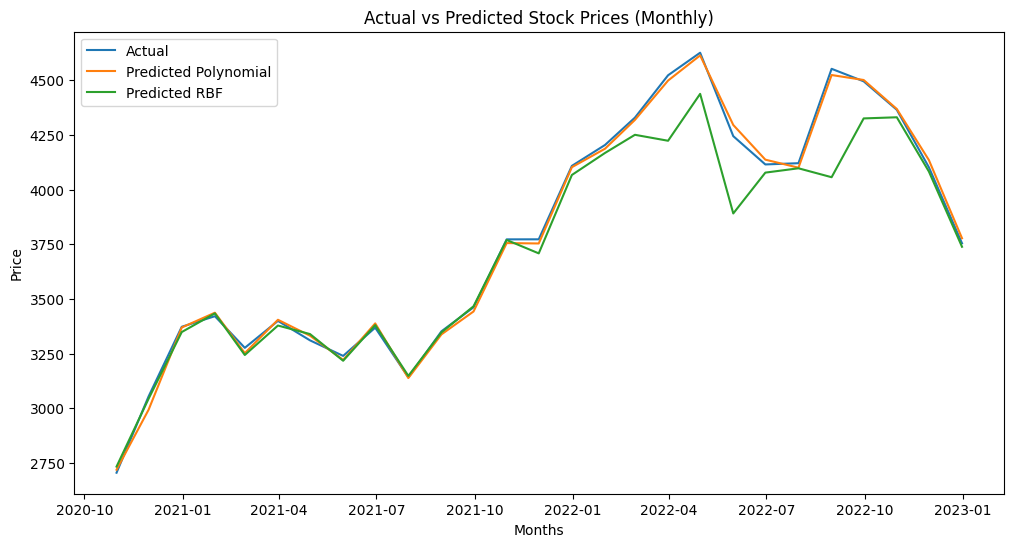

In [ ]:
# Plotting the monthly data
plt.figure(figsize=(12, 6))
plt.plot(months_actual, label='Actual')
plt.plot(months_predicted_poly, label='Predicted Polynomial')
plt.plot(months_predicted_rbf, label='Predicted RBF')
# plt.plot(months_predicted_lin, label='Predicted Linear')
plt.title("Actual vs Predicted Stock Prices (Monthly)")
plt.legend()
plt.xlabel("Months")
plt.ylabel("Price")
plt.show()

In [ ]:
months = pd.DataFrame({'actual' : months_actual,
                        # 'Linear': months_predicted_lin,
                        'Polynomial': months_predicted_poly,
                        'RBF': months_predicted_rbf})

months

,actual,Polynomial,RBF
Date,,,
2020-10-31,2705.000000,2718.554278,2733.051236
2020-11-30,3054.285714,2993.412494,3043.742471
2020-12-31,3372.631579,3369.357205,3348.514696
2021-01-31,3421.000000,3436.991344,3433.885451
2021-02-28,3276.315789,3252.070265,3243.561640
2021-03-31,3399.545455,3404.666539,3378.315522
2021-04-30,3310.476190,3331.782241,3339.318211
2021-05-31,3239.411765,3221.066557,3217.214399
2021-06-30,3368.571429,3388.039853,3380.304725


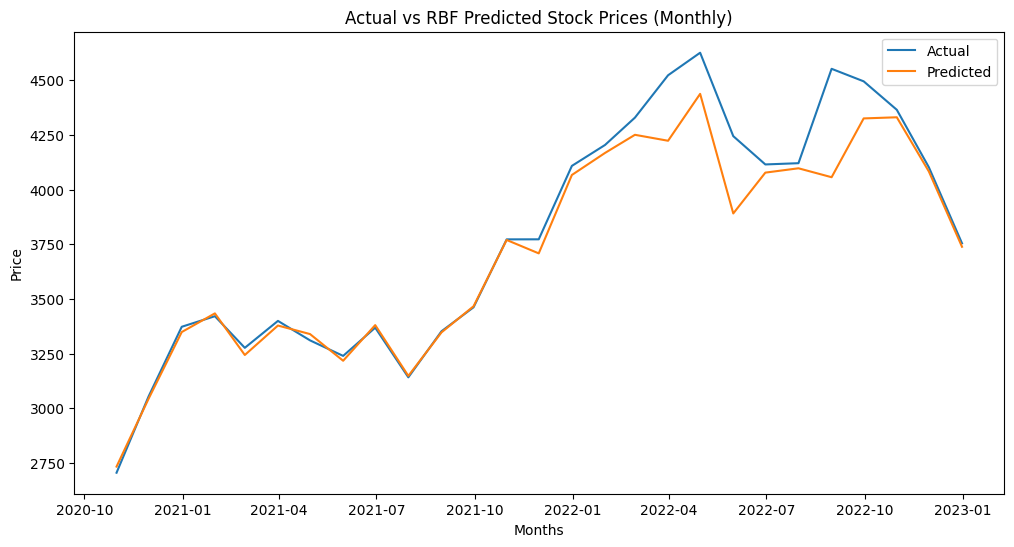

In [ ]:
# Plotting the monthly data
plt.figure(figsize=(12, 6))
plt.plot(months_actual, label='Actual')
plt.plot(months_predicted_rbf, label='Predicted')
plt.title("Actual vs RBF Predicted Stock Prices (Monthly)")
plt.legend()
plt.xlabel("Months")
plt.ylabel("Price")
plt.show()

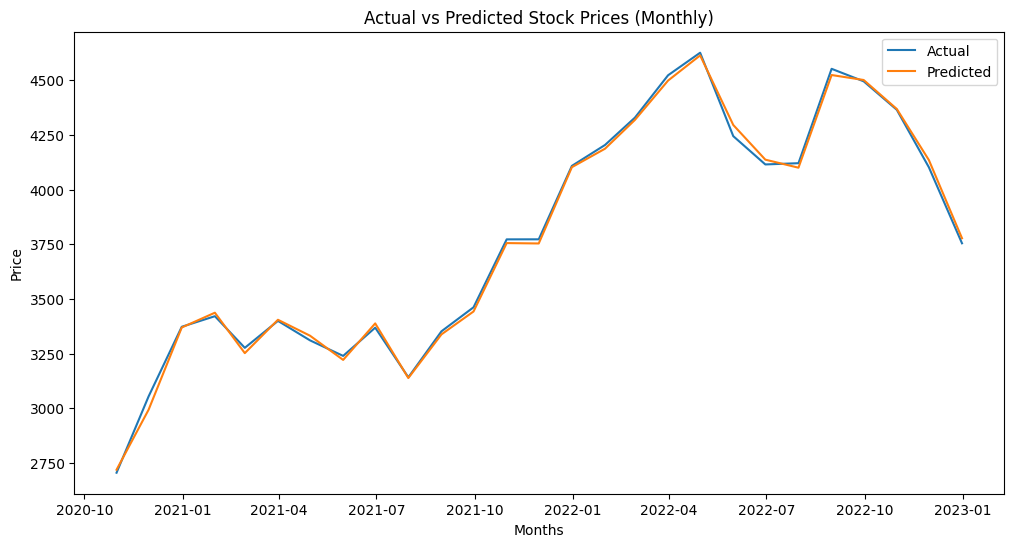

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(months_actual, label='Actual')
plt.plot(months_predicted_poly, label='Predicted')
plt.title("Actual vs Predicted Stock Prices (Monthly)")
plt.legend()
plt.xlabel("Months")
plt.ylabel("Price")
plt.show()

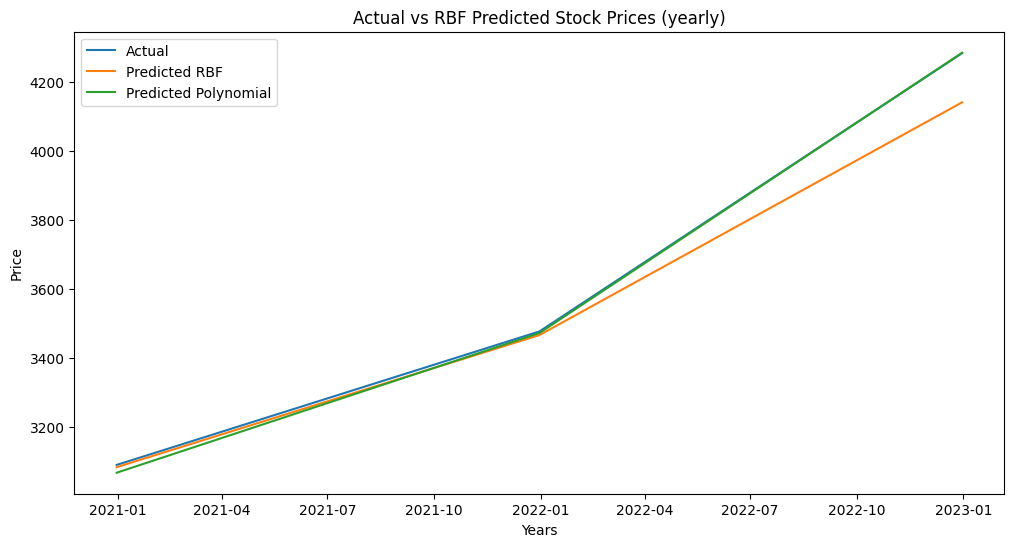

In [ ]:
# Plotting the monthly data
plt.figure(figsize=(12, 6))
plt.plot(year_actual, label='Actual')
plt.plot(year_predicted_rbf, label='Predicted RBF')
# plt.plot(year_predicted_lin, label='Predicted linear')
plt.plot(year_predicted_poly, label='Predicted Polynomial')
plt.title("Actual vs RBF Predicted Stock Prices (yearly)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Price")
plt.show()

In [ ]:
# # Create subplots for monthly and weekly data
# fig, axs = plt.subplots(2, 1, figsize=(12, 6))

# # Plotting the monthly data
# axs[0].plot(months_actual, label='Actual')
# axs[0].plot(months_predicted_poly, label='Predicted')
# axs[0].set_title("Actual vs Predicted Stock Prices (Monthly)")
# axs[0].legend()
# axs[0].set_xlabel("Months")
# axs[0].set_ylabel("Price")

# # Plotting the weekly data
# axs[1].plot(filtered_weeks_actual_poly, label='Actual')
# axs[1].plot(filtered_weeks_predicted_poly, label='Predicted')
# axs[1].set_title("Actual vs Predicted Stock Prices (Weekly From December)")
# axs[1].legend()
# axs[1].set_xlabel("Weeks")
# axs[1].set_ylabel("Price")

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

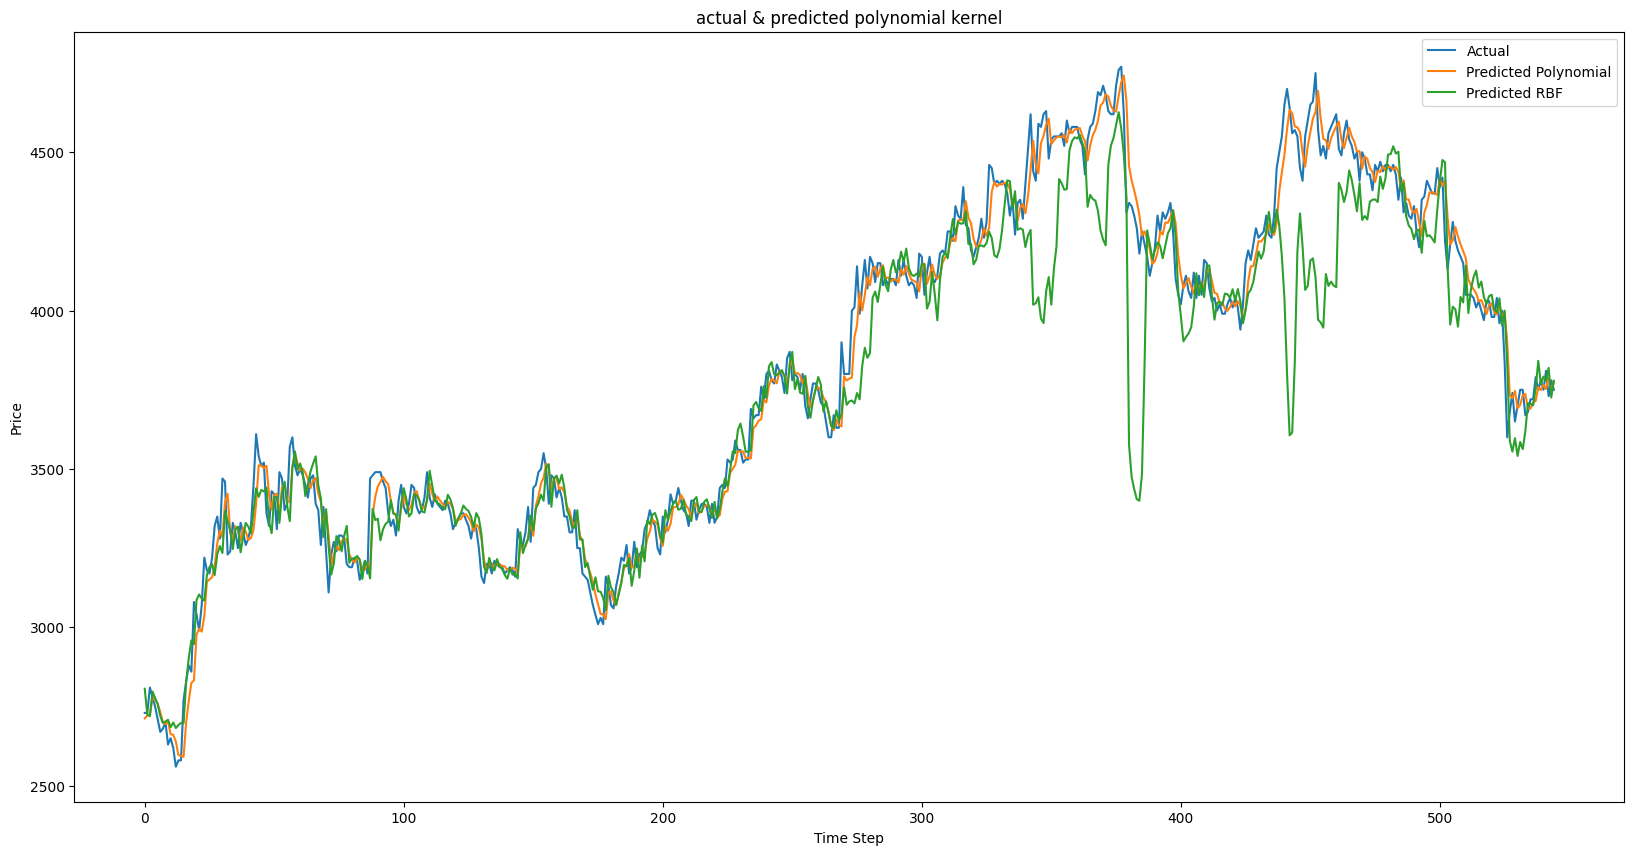

In [ ]:
# visualization
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='Actual')
plt.plot(pred_poly, label='Predicted Polynomial')
plt.plot(pred_rbf, label = 'Predicted RBF')
# plt.plot(pred_lin, label = 'Predicted Linear')
plt.title("actual & predicted polynomial kernel")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Value')

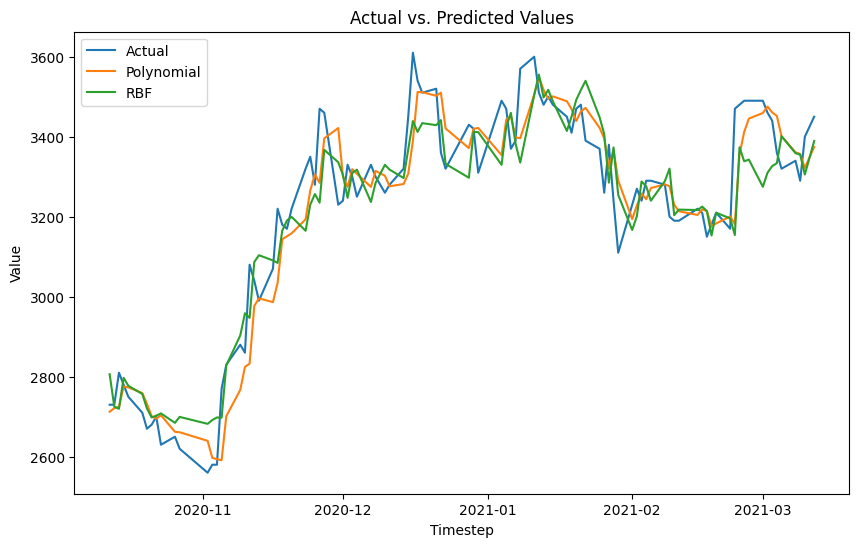

In [ ]:
# Set the range of timesteps
start_time = 0
end_time = 100

# Get the actual and predicted values within the specified range
actuals = df['Actual'].iloc[start_time:end_time]
pred_polys = df['Polynomial'].iloc[start_time:end_time]
pred_rbfs = df['RBF'].iloc[start_time:end_time]
# pred_lins = df['Linear'].iloc[start_time:end_time]

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual')
plt.plot(pred_polys, label='Polynomial')
plt.plot(pred_rbfs, label='RBF')
# plt.plot(pred_lins, label='Linear')

# Set the plot title and labels
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Value')

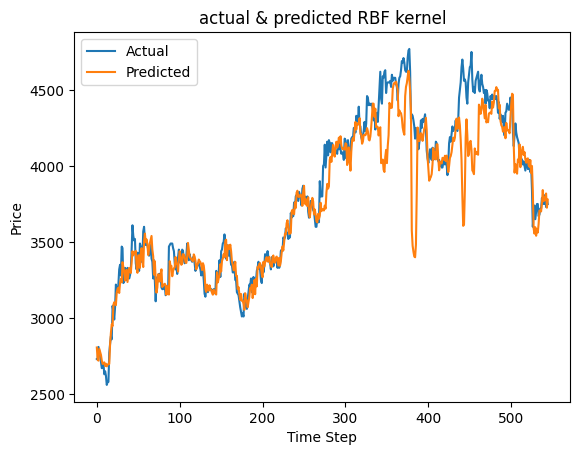

In [ ]:
plt.plot(y_test, label='Actual')
plt.plot(pred_rbf, label='Predicted')
plt.title("actual & predicted RBF kernel")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.show()

In [ ]:
# # Create subplots for monthly and weekly data
# fig, axs = plt.subplots(2, 1, figsize=(12, 6))

# # Plotting the monthly data
# axs[0].plot(months_actual_rbf, label='Actual')
# axs[0].plot(months_predicted_rbf, label='Predicted')
# axs[0].set_title("Actual vs Predicted Stock Prices (Monthly)")
# axs[0].legend()
# axs[0].set_xlabel("Months")
# axs[0].set_ylabel("Price")

# # Plotting the weekly data
# axs[1].plot(filtered_weeks_actual_rbf, label='Actual')
# axs[1].plot(filtered_weeks_predicted_rbf, label='Predicted')
# axs[1].set_title("Actual vs RBF Predicted Stock Prices (Weekly From December)")
# axs[1].legend()
# axs[1].set_xlabel("Weeks")
# axs[1].set_ylabel("Price")

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()